# Assignment 3 - Chemicals Segregation
## Can you Separate the chemicals?
## Binary Classification Challenge
### A chemist has two chemical flasks labelled 1 and 0 which contains two different chemicals. He extracted 3 features from these chemicals in order to distinguish between them. You are provided with the results derived by the chemist and your task is to create a model that will label chemical 0 or 1 given its three features.
### Data Description
### You are provided with two files test and train.
### ● Train: This files consists of two csv files Logistic Xtrain and LogisticYtrain. Xtrain consists of the features whereas Ytrain consists of the labels associated with the features.
### ● Test: This file consists of two files Logistic Xtest consisting of the features of testdata

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train=pd.read_csv('Logistic_X_Train.csv')
print(x_train.head())
print(x_train.shape)

         f1        f2        f3
0 -1.239375  0.749101 -0.528515
1 -1.036070  0.801436 -1.283712
2 -0.615579  1.579521 -1.391927
3  1.335978  1.348651  1.433564
4  0.658925  1.300019  0.571603
(3000, 3)


In [4]:
y_train=pd.read_csv('Logistic_Y_Train.csv')
print(y_train.head())
print(y_train.shape)

   label
0      1
1      1
2      1
3      0
4      0
(3000, 1)


In [32]:
x_test=pd.read_csv('Logistic_X_Test.csv')
print(x_test.head())
print(x_test.shape)

         f1        f2        f3
0 -0.767508 -0.261859 -2.514831
1 -1.241653  1.449001 -0.413089
2  1.925270  1.931761  1.342619
3 -1.298255  1.049761 -0.527319
4 -0.964712  0.938088 -1.186328
(1000, 3)


In [6]:
x_train=np.c_[x_train['f1'],x_train['f2'],x_train['f3']]
print(x_train) 

[[-1.23937466  0.74910149 -0.52851491]
 [-1.03607028  0.80143631 -1.28371152]
 [-0.61557914  1.57952053 -1.39192706]
 ...
 [ 0.08827657  1.63878904 -2.19364056]
 [ 1.52515501  0.85923429  1.50530791]
 [-0.97981744  0.56395376 -1.53939416]]


In [7]:
y_train=np.c_[y_train['label']]
print(y_train)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [8]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [9]:
def sigmoid(hx):
    return 1.0/(1.0+np.exp(-1.0*hx))

In [26]:
def error(x,w,b,y):
    err=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=(y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx))
    return err/x.shape[0]

In [16]:
def gradient(x,w,b,y):
    grad_b=0
    grad_w=np.zeros(w.shape)
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        grad_b+=(y[i]-hx)
        grad_w+=(y[i]-hx)*x[i]
    grad_w/=x.shape[0]
    grad_b/=x.shape[0]
    return [grad_w,grad_b]

In [13]:
def gradientDescent(x,w,b,y,learning_rate=0.01):
    err=error(x,w,b,y)
    [grad_w,grad_b]=gradient(x,w,b,y)
    b+=learning_rate*grad_b
    w+=learning_rate*grad_w
    return err,w,b

In [27]:
def predict(x_tst,w,b):
    confidence=hypothesis(x_tst,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [28]:
w=np.zeros((x_train.shape[1],))
b=0
print(w,b)
loss=[]
y_pred=[]

for i in range(1000):
    l,w,b=gradientDescent(x_train,w,b,y_train,learning_rate=0.1)
    loss.append(l)
    

[0. 0. 0.] 0


In [33]:
x_test=np.c_[x_test['f1'],x_test['f2'],x_test['f3']]
print(x_test)

[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 ...
 [-1.18696873  0.94734729 -0.78638597]
 [-0.53232395  1.84516978 -0.9935503 ]
 [ 0.54023217  0.58099406  0.38664901]]


In [34]:
for i in range(x_test.shape[0]):
    y_pred.append(predict(x_test[i],w,b))

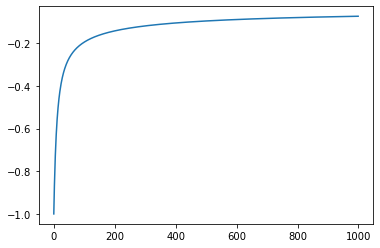

In [29]:
plt.plot(loss)
plt.show()

In [35]:
print(y_pred)

[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 